In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Setup for nice visuals
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv(r"C:\Users\kotireddy81\OneDrive\Desktop\Kavya\DATA ANALYTICS\Skillcraft internship\train.csv")

# Initial exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)
print(df.shape)
print(df.isnull().sum())

# Handle missing data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Type conversions
df['Survived'] = df['Survived'].astype(int)
df['Pclass'] = df['Pclass'].astype('category')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\kotireddy81\AppData\Local\Temp\ipykernel_16816\3869857920.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\kotireddy81\AppData\Local\Temp\ipykernel_16816\3869857920.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

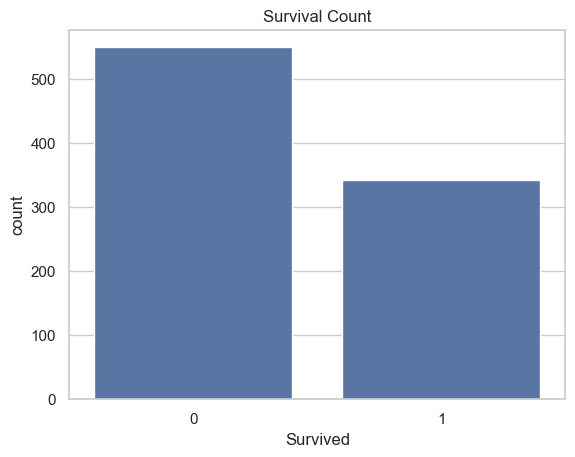

In [81]:
# 1. Survival count
plt.figure()
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

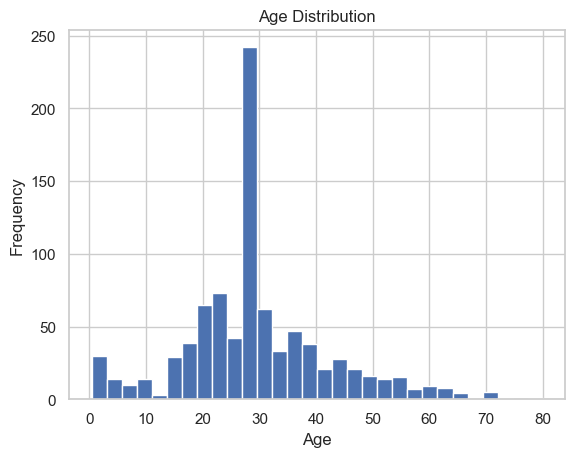

In [82]:

# 2. Age distribution
plt.figure()
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

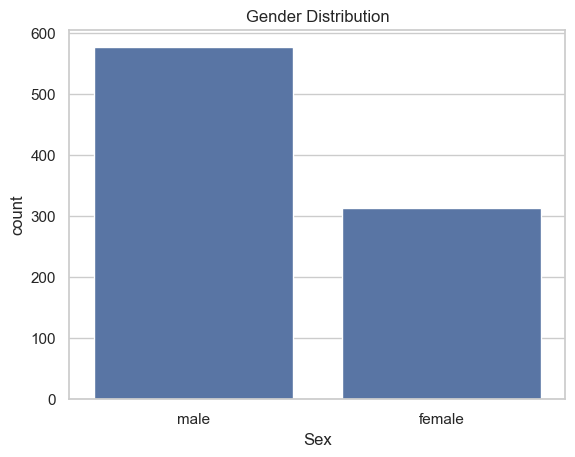

In [83]:
# 3. Gender distribution
plt.figure()
sns.countplot(data=df, x='Sex')
plt.title("Gender Distribution")
plt.show()

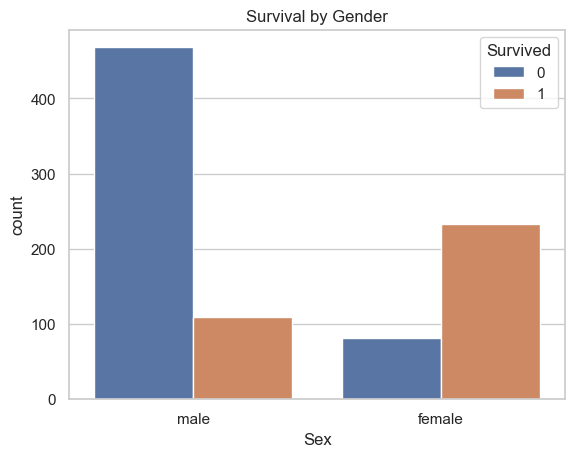

In [84]:

# 4. Survival by Gender
plt.figure()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

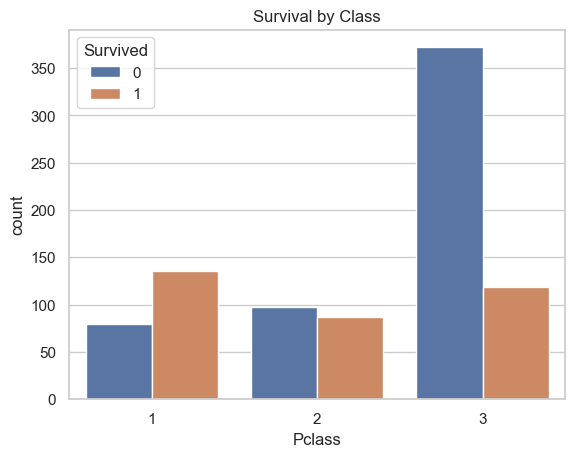

In [85]:

# 5. Survival by Passenger Class
plt.figure()
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

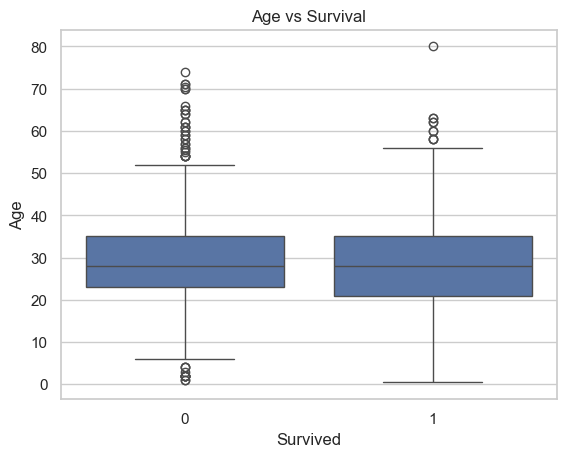

In [86]:
# 6. Age vs Survival
plt.figure()
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age vs Survival")
plt.show()

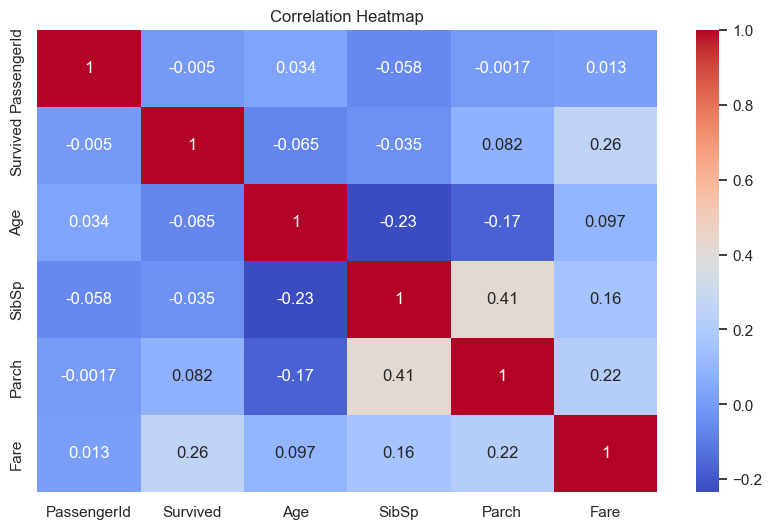

In [87]:
# 7. Correlation Heatmap (only numeric columns)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')  # avoid non-numeric like 'Name', 'Sex', etc.
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [88]:
# 8. Average survival rate by gender
print("\nAverage Survival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())


Average Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [89]:
# 9. Survival rate by class
print("\nSurvival Rate by Passenger Class:")
print(df.groupby('Pclass')['Survived'].mean())


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\Users\kotireddy81\AppData\Local\Temp\ipykernel_16816\1647876951.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())


In [90]:
# 10. Pivot table: survival by sex and class
print("\nPivot Table (Survival by Sex and Class):")
print(pd.pivot_table(df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean'))


Pivot Table (Survival by Sex and Class):
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


C:\Users\kotireddy81\AppData\Local\Temp\ipykernel_16816\2338813243.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(pd.pivot_table(df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean'))
